In [11]:
import numpy as np
def sigmoid(z):

    s = 1/(1+np.exp(-z))
    
    return s

def initialize_with_zeros(dim):

    
    w = np.zeros(shape= (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b
def propagate(w, b, X, Y):

    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(X,w) +b)                                   # compute activation
    cost = (-1/m)*((np.dot(np.log(A).T,Y))+(np.dot(np.log(1-A).T,1-Y)))                               # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1/m*np.dot(X.T,(A-Y))
    db = 1/m*np.sum(A-Y)

    # print("w=",w.shape,"dw=",dw.shape,"A=",A.shape,"cost=",cost)


    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


# function to create a list containing mini-batches by rando shuffling
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def SGD(w, b, X, Y, num_iterations, learning_rate,X_val,y_val, print_cost = False,batch_size=64):

    
    losses = []
    costs=[]
    
    for i in range(num_iterations):

        mini_batches = create_mini_batches(X, Y, batch_size)
        for mini_batch in mini_batches:
        
          X_mini, y_mini = mini_batch
          # Cost and gradient calculation
          grads, cost = propagate(w, b, X_mini, y_mini)
          
          # Retrieve derivatives from grads
          dw = grads["dw"]
          db = grads["db"]
          
          # update rule
          w -= learning_rate*dw
          b -= learning_rate*db
        
        # Record the costs
        if i % 10 == 0:
            costs.append(cost)


        # record losses
        y_hat=predict(w,b,X_val)
        loss=log_loss(y_val, y_hat)
        losses.append(loss)


        # Print the cost every 100 training iterations
        if print_cost and i % 10 == 0:
            print ("cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs,losses





def GD(w, b, X, Y, num_iterations, learning_rate,X_val,y_val, print_cost = False):

    losses = []
    costs = []
    
    for i in range(num_iterations):

        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate*dw
        b -= learning_rate*db
        
        # Record the costs
        if i % 10 == 0:
            costs.append(cost)

        # record losses
        y_hat=predict(w,b,X_val)
        loss=log_loss(y_val, y_hat)
        losses.append(loss)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, losses

def predict(w, b, X):

    
    m = X.shape[0]
    Y_prediction = np.zeros((m,1))
    w = w.reshape(X.shape[1], 1)
    
    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(X,w) + b)
    
    for i in range(A.shape[0]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[i,0] > 0.5:
            Y_prediction[i,0] = 1
        else:
            Y_prediction[i,0] = 0
    
    assert(Y_prediction.shape == (m, 1))
    
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations = 900, learning_rate = 0.05, print_cost = False, optimizer="SGD"):

    Y_train=Y_train.reshape(-1,1)
    Y_test=Y_test.reshape(-1,1)
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[1])

    if optimizer=="SGD":
      # Gradient descent
      parameters, grads, costs, losses = SGD(w , b , X_train , Y_train , num_iterations , learning_rate ,
                                            X_test,Y_test,print_cost)
    else:
      parameters, grads, costs, losses = GD(w , b , X_train , Y_train , num_iterations , learning_rate ,
                                            X_test,Y_test,print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w , b , X_test)
    Y_prediction_train = predict(w , b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    print("Total validation loss: {}".format(log_loss(Y_test, Y_prediction_test)))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "losses": losses}
    
    return d

In [12]:
from sklearn.metrics import log_loss
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt
import math
import csv
import time
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from random import shuffle

**Reading Data set pre saved into csv format**

In [13]:
dt=pd.read_csv('data_1.csv')
dt.shape

(32560, 123)

**Converting labels into 0 and 1 for our own convenience they can be retrasfoemd at the end if we want**

In [14]:
le = preprocessing.LabelEncoder()
le.fit(dt["target"])
y=le.transform(dt["target"])
y.shape

(32560,)

In [15]:
# splitting data into train and test set by randomly shuffling
X_train, X_test, y_train, y_test = train_test_split(dt.iloc[:,1:], y, test_size=0.33)
print(X_train.shape,y_train.shape)

(21815, 122) (21815,)


In [16]:
result=model(X_train.values, y_train, X_test.values, y_test, num_iterations = 100, learning_rate = 0.005, print_cost = True, optimizer="SGD")

cost after iteration 0: 0.236143
cost after iteration 10: 0.233998
cost after iteration 20: 0.162300
cost after iteration 30: 0.151119
cost after iteration 40: 0.112193
cost after iteration 50: 0.175938
cost after iteration 60: 0.145338
cost after iteration 70: 0.197125
cost after iteration 80: 0.163579
cost after iteration 90: 0.101184
train accuracy: 83.86431354572542 %
test accuracy: 84.16007445323406 %
Total validation loss: 5.470955608411938


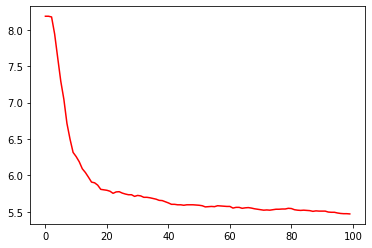

In [17]:
# curve for loss validation with respect to iterations FOR GRADIENT DESCENT
plt.plot(list(range(len(result["losses"]))), result["losses"], '-r')